In [152]:
#import package
import numpy as np
np.random.seed(23521049)
import matplotlib.pyplot as plt

In [153]:
#Define target function
def target_function(x):
    return np.sin(1 + x**2)

In [154]:
#Define function to random data
def random_data(n):
    x_train = np.random.uniform(0,1,n)
    y_train = target_function(x_train) + np.random.normal(0,0.03,n)
    x_test = np.random.uniform(0,1,n)
    y_test = target_function(x_test) + np.random.normal(0,0.03,n)
    return x_train.reshape(-1,1),y_train,x_test.reshape(-1,1),y_test

In [155]:
#Create D1_data,D2_data,D3_data
D1_train_x,D1_train_y, D1_test_x,D1_test_y = random_data(10)
D2_train_x,D2_train_y, D2_test_x,D2_test_y = random_data(10)
D3_train_x,D3_train_y, D3_test_x,D3_test_y = random_data(10)

# Data with 10 random points

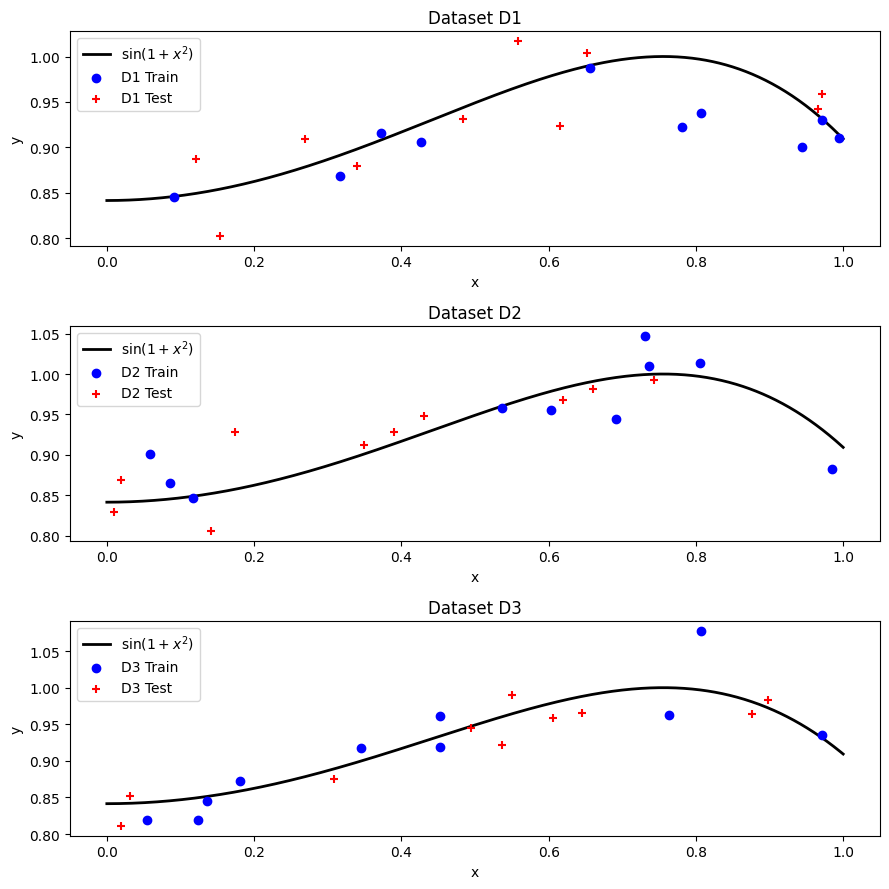

In [156]:
x_vals = np.linspace(0, 1, 1000)
y_vals = target_function(x_vals)
plt.figure(figsize=(9, 9))

# D1 plot
plt.subplot(3, 1, 1)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D1_train_x, D1_train_y, color='blue', label='D1 Train', zorder=5)
plt.scatter(D1_test_x, D1_test_y, color='red', marker='+', label='D1 Test', zorder=5)
plt.title('Dataset D1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D2 plot
plt.subplot(3, 1, 2)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D2_train_x, D2_train_y, color='blue', label='D2 Train', zorder=5)
plt.scatter(D2_test_x, D2_test_y, color='red', marker='+', label='D2 Test', zorder=5)
plt.title('Dataset D2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D3 plot
plt.subplot(3, 1, 3)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D3_train_x, D3_train_y, color='blue', label='D3 Train', zorder=5)
plt.scatter(D3_test_x, D3_test_y, color='red', marker='+', label='D3 Test', zorder=5)
plt.title('Dataset D3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

In [157]:
#Import package to use LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [158]:
#The list contains PolynomialFeatures object with different degrees
#Note:index0:degree = 1,.....
polynomialfeatures_list = [PolynomialFeatures(i) for i in range(1,10)]

## D1 Dataset

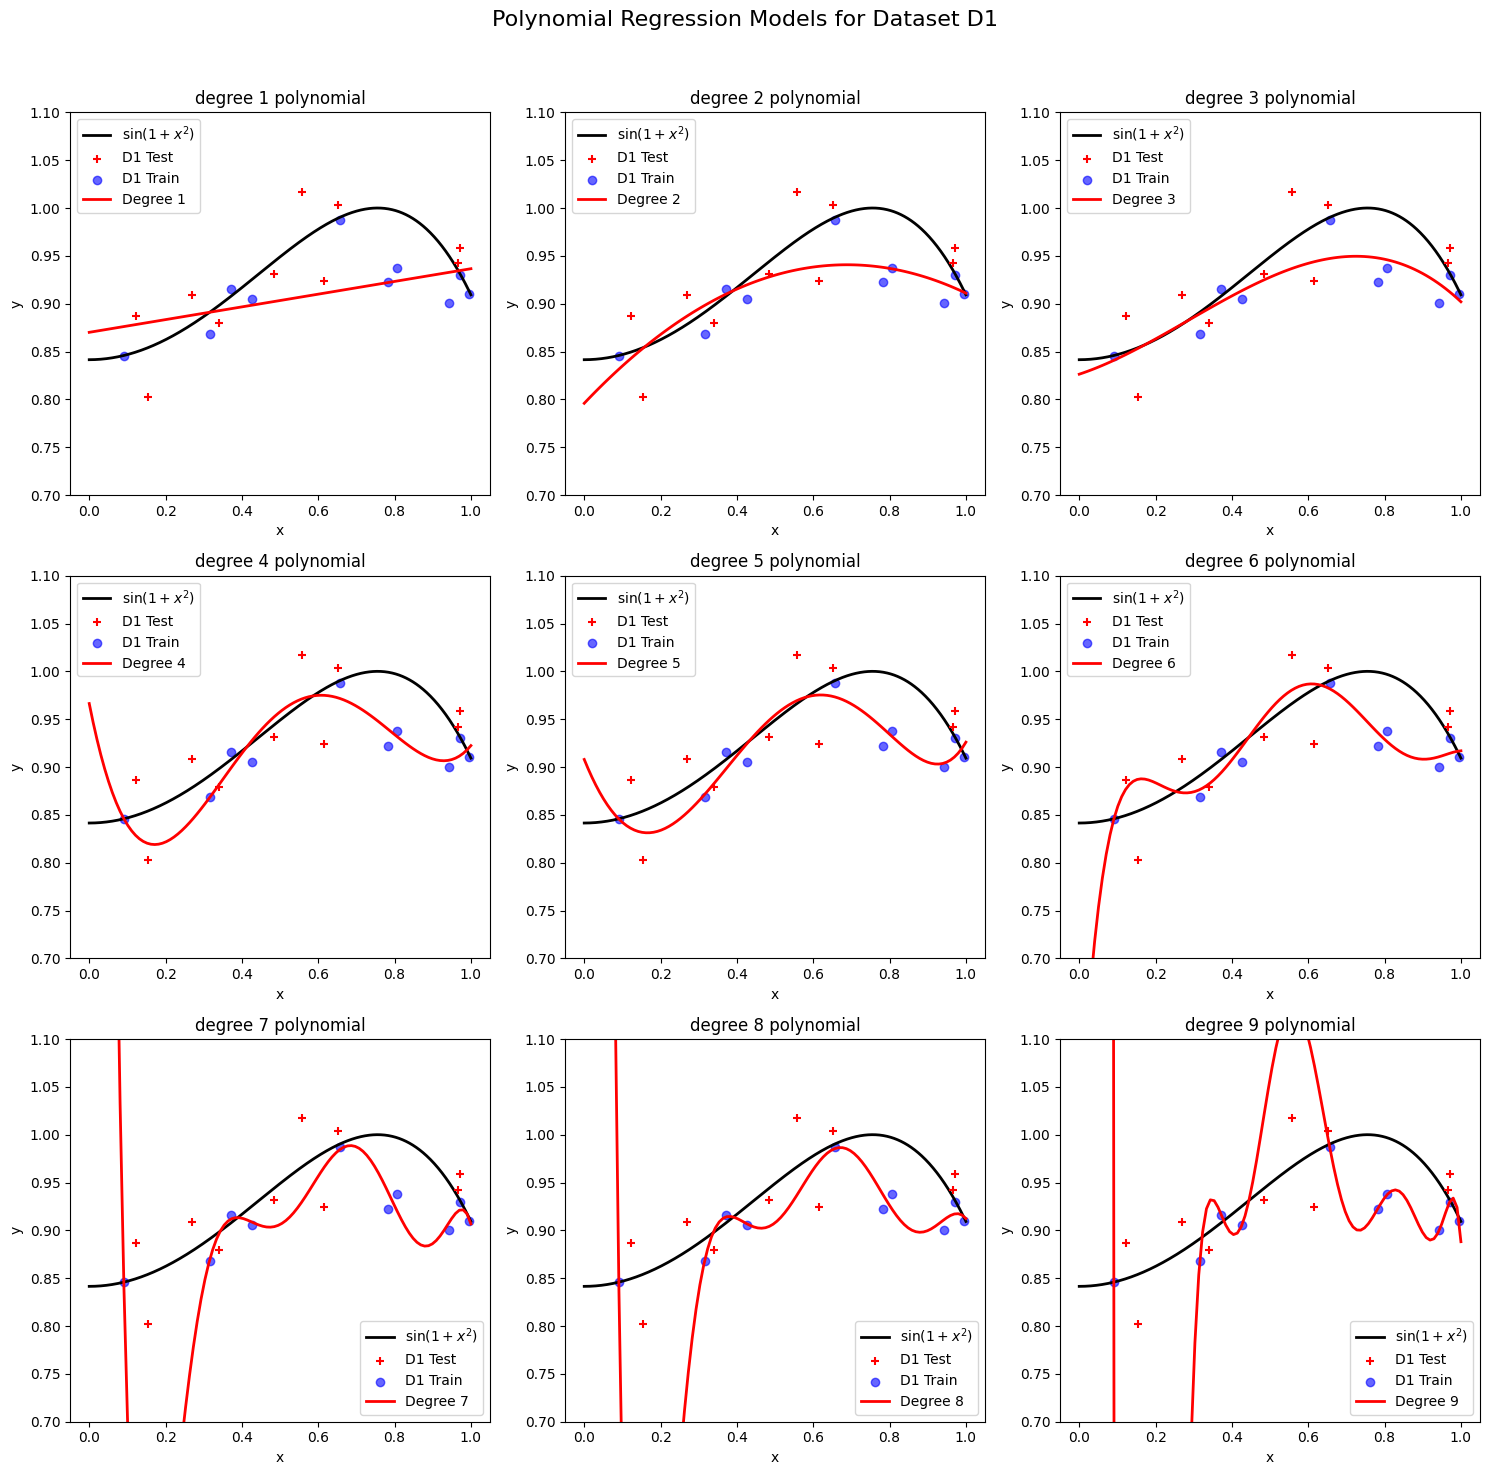

In [159]:
#With D1 dataset
X_poly_D1_list = [polynomial_feature.fit_transform(D1_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D1 = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(models_list_D1, X_poly_D1_list):
    model.fit(X_poly, D1_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]  # Transform for each degree

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D1", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D1)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D1_test_x, D1_test_y, color='red', marker='+', label='D1 Test', zorder=5)
    ax.scatter(D1_train_x, D1_train_y, color='blue', label='D1 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [160]:
#Calculate E_in and E_out
from sklearn.metrics import mean_squared_error
E_in_list_D1 = []
E_out_list_D1 = []


X_poly_D1_test_list = [poly.fit_transform(D1_test_x) for poly in polynomialfeatures_list]

for model, X_poly_train, X_poly_test in zip(models_list_D1, X_poly_D1_list, X_poly_D1_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D1_train_y, y_train_pred)
    E_in_list_D1.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D1_test_y, y_test_pred)
    E_out_list_D1.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D1, E_out_list_D1):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")

Degree 1: E_in = 0.0009, E_out = 0.0029
Degree 2: E_in = 0.0004, E_out = 0.0019
Degree 3: E_in = 0.0004, E_out = 0.0018
Degree 4: E_in = 0.0002, E_out = 0.0017
Degree 5: E_in = 0.0002, E_out = 0.0016
Degree 6: E_in = 0.0002, E_out = 0.0017
Degree 7: E_in = 0.0001, E_out = 0.0329
Degree 8: E_in = 0.0001, E_out = 0.0737
Degree 9: E_in = 0.0000, E_out = 6.6878


## The Table of $E_{in}$ and $E_{out}$ in Dataset D1
| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0009    | 0.0029     |
| **2**   | 0.0004    | 0.0019     |
| **3**   | 0.0004    | 0.0018     |
| **4**   | 0.0002    | 0.0017     |
| **5**   | 0.0002    | 0.0016     |
| **6**   | 0.0002    | 0.0017     |
| **7**   | 0.0001    | 0.0329     |
| **8**   | 0.0001    | 0.0737     |
| **9**   | 0.0000    | 6.6878     |


## D2 Dataset

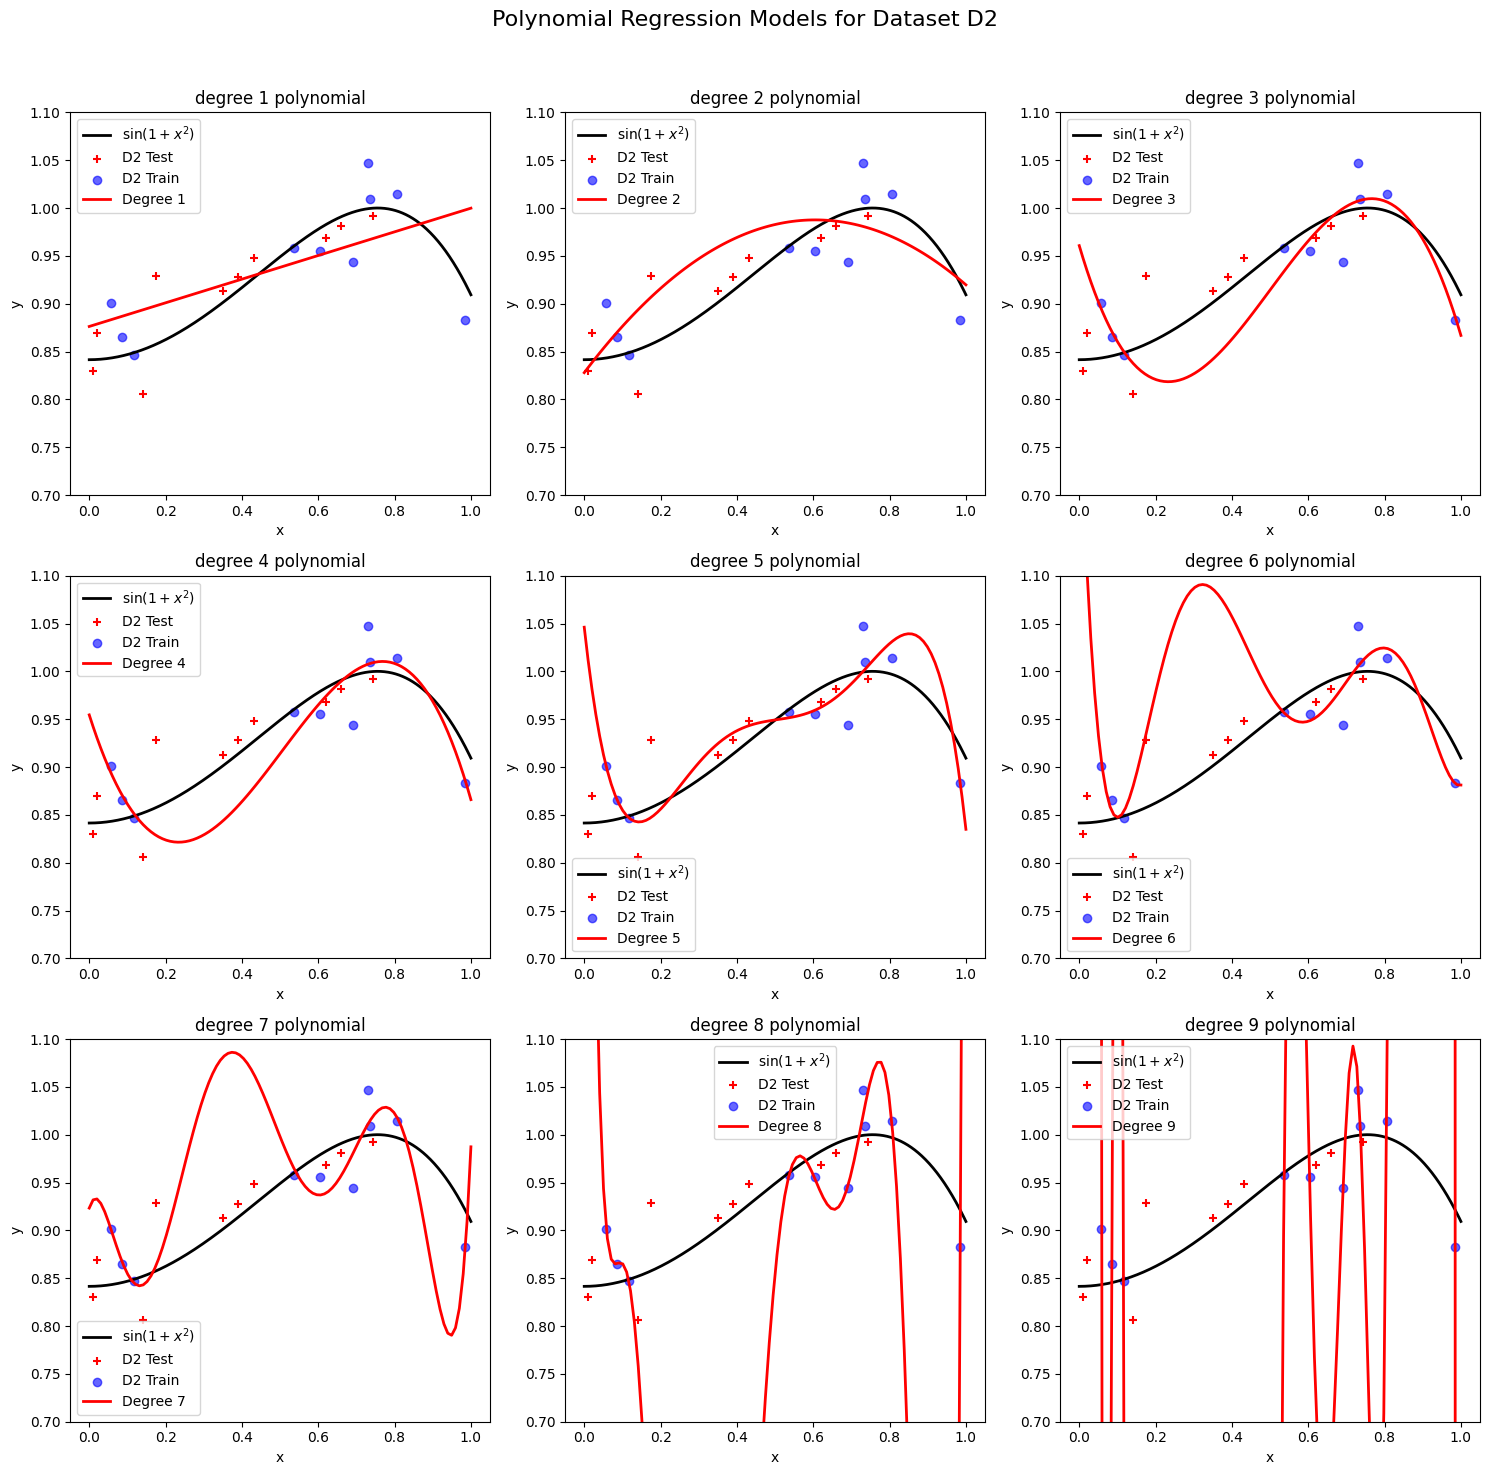

In [161]:
#With D2 dataset
X_poly_D2_list = [polynomial_feature.fit_transform(D2_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D2 = [LinearRegression() for _ in range(1, 10)]

for model, X_poly in zip(models_list_D2, X_poly_D2_list):
    model.fit(X_poly, D2_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]  # Transform for each degree

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D2", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D2)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D2_test_x, D2_test_y, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D2_train_x, D2_train_y, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [162]:
E_in_list_D2 = []
E_out_list_D2 = []

X_poly_D2_test_list = [poly.fit_transform(D2_test_x) for poly in polynomialfeatures_list]
for model, X_poly_train, X_poly_test in zip(models_list_D2, X_poly_D2_list, X_poly_D2_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D2_train_y, y_train_pred)
    E_in_list_D2.append(E_in)
    
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D2_test_y, y_test_pred)
    E_out_list_D2.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D2, E_out_list_D2):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")


Degree 1: E_in = 0.0026, E_out = 0.0013
Degree 2: E_in = 0.0016, E_out = 0.0014
Degree 3: E_in = 0.0006, E_out = 0.0045
Degree 4: E_in = 0.0006, E_out = 0.0043
Degree 5: E_in = 0.0004, E_out = 0.0056
Degree 6: E_in = 0.0004, E_out = 0.0262
Degree 7: E_in = 0.0003, E_out = 0.0088
Degree 8: E_in = 0.0001, E_out = 0.4050
Degree 9: E_in = 0.0000, E_out = 1870.5349


## The Table of $E_{in}$ and $E_{out}$ in Dataset D2
| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0026    | 0.0013     |
| **2**   | 0.0016    | 0.0014     |
| **3**   | 0.0006    | 0.0045     |
| **4**   | 0.0006    | 0.0043     |
| **5**   | 0.0004    | 0.0056     |
| **6**   | 0.0004    | 0.0262     |
| **7**   | 0.0003    | 0.0088     |
| **8**   | 0.0001    | 0.4050     |
| **9**   | 0.0000    | 1870.5349  |


## D3 Dataset



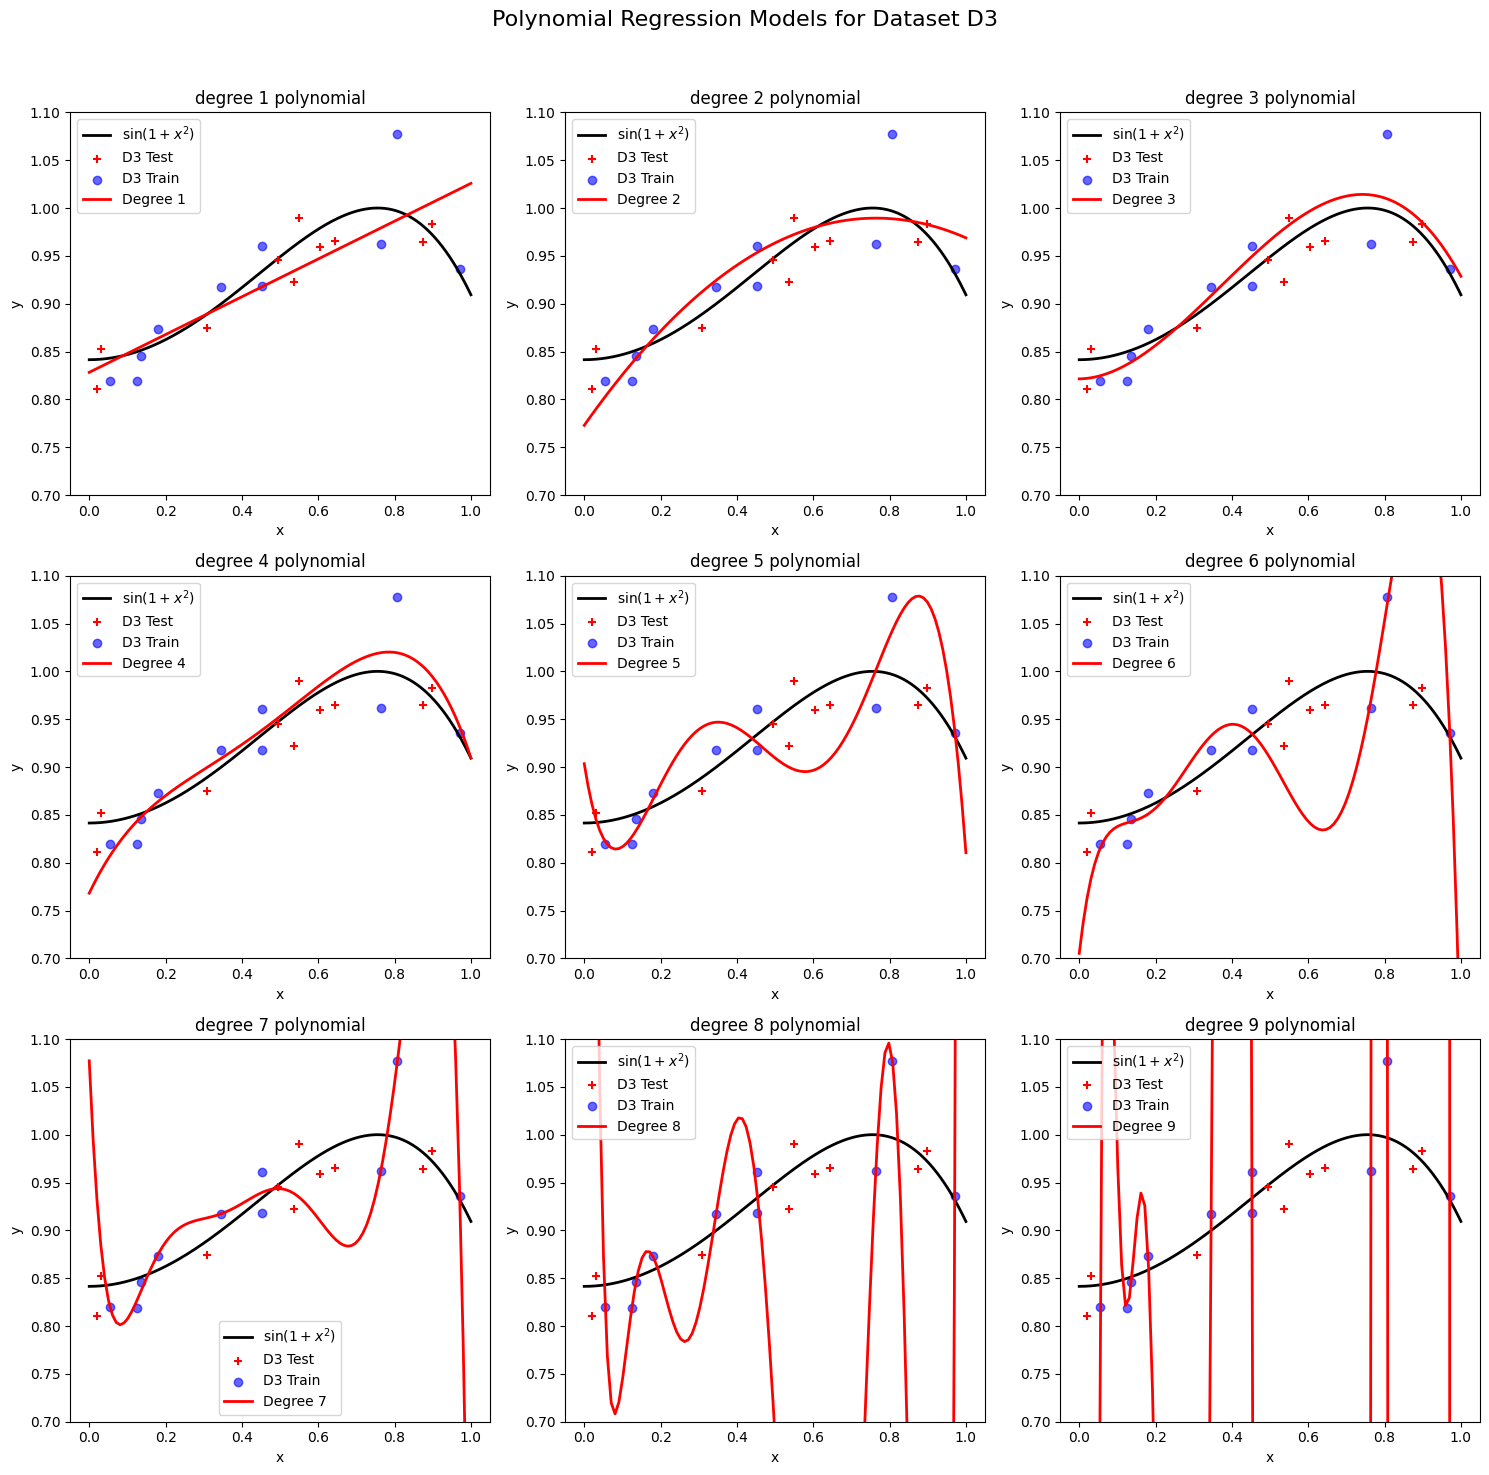

In [165]:
X_poly_D3_list = [polynomial_feature.fit_transform(D3_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D3 = [LinearRegression() for _ in range(1, 10)]

for model, X_poly in zip(models_list_D3, X_poly_D3_list):
    model.fit(X_poly, D3_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D3", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D3)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D3_test_x, D3_test_y, color='red', marker='+', label='D3 Test', zorder=5)
    ax.scatter(D3_train_x, D3_train_y, color='blue', label='D3 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [166]:
E_in_list_D3 = []
E_out_list_D3 = []

X_poly_D3_test_list = [poly.fit_transform(D3_test_x) for poly in polynomialfeatures_list]

for model, X_poly_train, X_poly_test in zip(models_list_D3, X_poly_D3_list, X_poly_D3_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D3_train_y, y_train_pred)
    E_in_list_D3.append(E_in)
    
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D3_test_y, y_test_pred)
    E_out_list_D3.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D3, E_out_list_D3):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")


Degree 1: E_in = 0.0019, E_out = 0.0006
Degree 2: E_in = 0.0012, E_out = 0.0010
Degree 3: E_in = 0.0009, E_out = 0.0009
Degree 4: E_in = 0.0008, E_out = 0.0011
Degree 5: E_in = 0.0005, E_out = 0.0046
Degree 6: E_in = 0.0002, E_out = 0.0173
Degree 7: E_in = 0.0001, E_out = 0.0266
Degree 8: E_in = 0.0001, E_out = 0.6591
Degree 9: E_in = 0.0000, E_out = 4206.7686


## The Table of $E_{in}$ and $E_{out}$ in Dataset D3
| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0019    | 0.0006     |
| **2**   | 0.0012    | 0.0010     |
| **3**   | 0.0009    | 0.0009     |
| **4**   | 0.0008    | 0.0011     |
| **5**   | 0.0005    | 0.0046     |
| **6**   | 0.0002    | 0.0173     |
| **7**   | 0.0001    | 0.0266     |
| **8**   | 0.0001    | 0.6591     |
| **9**   | 0.0000    | 4206.7686  |


# Data with 100 random points

In [169]:
#Create D1_data,D2_data,D3_data
D1_train_x,D1_train_y, D1_test_x,D1_test_y = random_data(100)
D2_train_x,D2_train_y, D2_test_x,D2_test_y = random_data(100)
D3_train_x,D3_train_y, D3_test_x,D3_test_y = random_data(100)

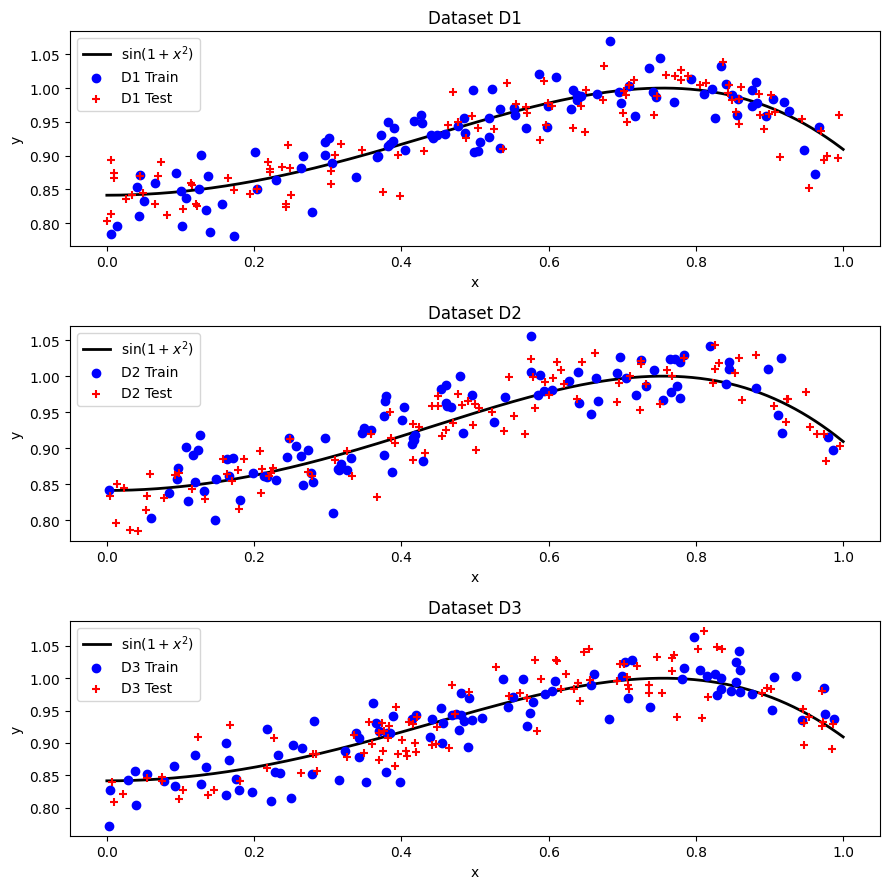

In [170]:
x_vals = np.linspace(0, 1, 1000)
y_vals = target_function(x_vals)
plt.figure(figsize=(9, 9))

# D1 plot
plt.subplot(3, 1, 1)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D1_train_x, D1_train_y, color='blue', label='D1 Train', zorder=5)
plt.scatter(D1_test_x, D1_test_y, color='red', marker='+', label='D1 Test', zorder=5)
plt.title('Dataset D1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D2 plot
plt.subplot(3, 1, 2)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D2_train_x, D2_train_y, color='blue', label='D2 Train', zorder=5)
plt.scatter(D2_test_x, D2_test_y, color='red', marker='+', label='D2 Test', zorder=5)
plt.title('Dataset D2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D3 plot
plt.subplot(3, 1, 3)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D3_train_x, D3_train_y, color='blue', label='D3 Train', zorder=5)
plt.scatter(D3_test_x, D3_test_y, color='red', marker='+', label='D3 Test', zorder=5)
plt.title('Dataset D3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## D1 Dataset

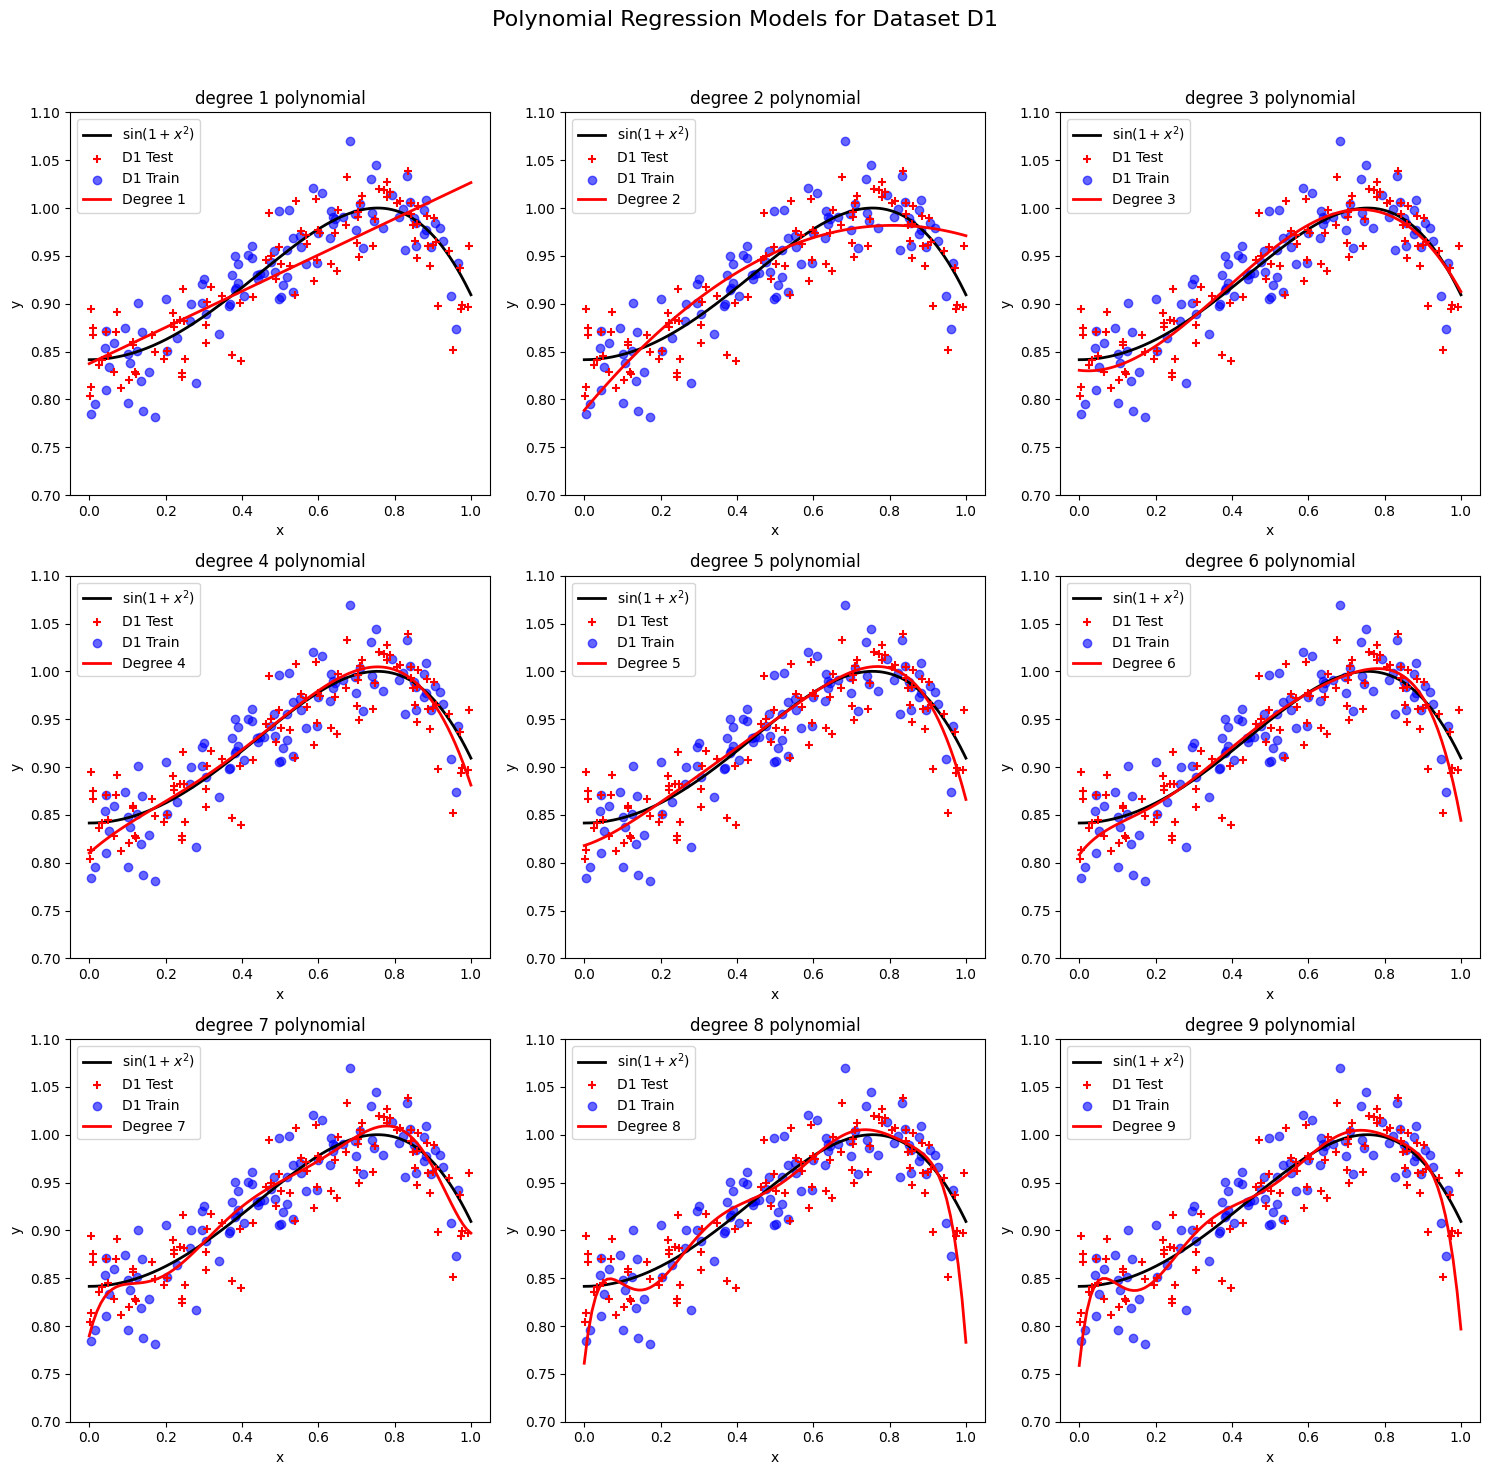

In [171]:
#With D1 dataset
X_poly_D1_list = [polynomial_feature.fit_transform(D1_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D1 = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(models_list_D1, X_poly_D1_list):
    model.fit(X_poly, D1_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]  # Transform for each degree

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D1", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D1)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D1_test_x, D1_test_y, color='red', marker='+', label='D1 Test', zorder=5)
    ax.scatter(D1_train_x, D1_train_y, color='blue', label='D1 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [172]:
E_in_list_D1 = []
E_out_list_D1 = []


X_poly_D1_test_list = [poly.fit_transform(D1_test_x) for poly in polynomialfeatures_list]

for model, X_poly_train, X_poly_test in zip(models_list_D1, X_poly_D1_list, X_poly_D1_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D1_train_y, y_train_pred)
    E_in_list_D1.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D1_test_y, y_test_pred)
    E_out_list_D1.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D1, E_out_list_D1):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")

Degree 1: E_in = 0.0015, E_out = 0.0020
Degree 2: E_in = 0.0010, E_out = 0.0015
Degree 3: E_in = 0.0008, E_out = 0.0009
Degree 4: E_in = 0.0008, E_out = 0.0010
Degree 5: E_in = 0.0008, E_out = 0.0010
Degree 6: E_in = 0.0008, E_out = 0.0010
Degree 7: E_in = 0.0008, E_out = 0.0010
Degree 8: E_in = 0.0007, E_out = 0.0014
Degree 9: E_in = 0.0007, E_out = 0.0013


## The Table of $E_{in}$ and $E_{out}$ in Dataset D1
| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0015    | 0.0020     |
| **2**   | 0.0010    | 0.0015     |
| **3**   | 0.0008    | 0.0009     |
| **4**   | 0.0008    | 0.0010     |
| **5**   | 0.0008    | 0.0010     |
| **6**   | 0.0008    | 0.0010     |
| **7**   | 0.0008    | 0.0010     |
| **8**   | 0.0007    | 0.0014     |
| **9**   | 0.0007    | 0.0013     |


## D2 Dataset

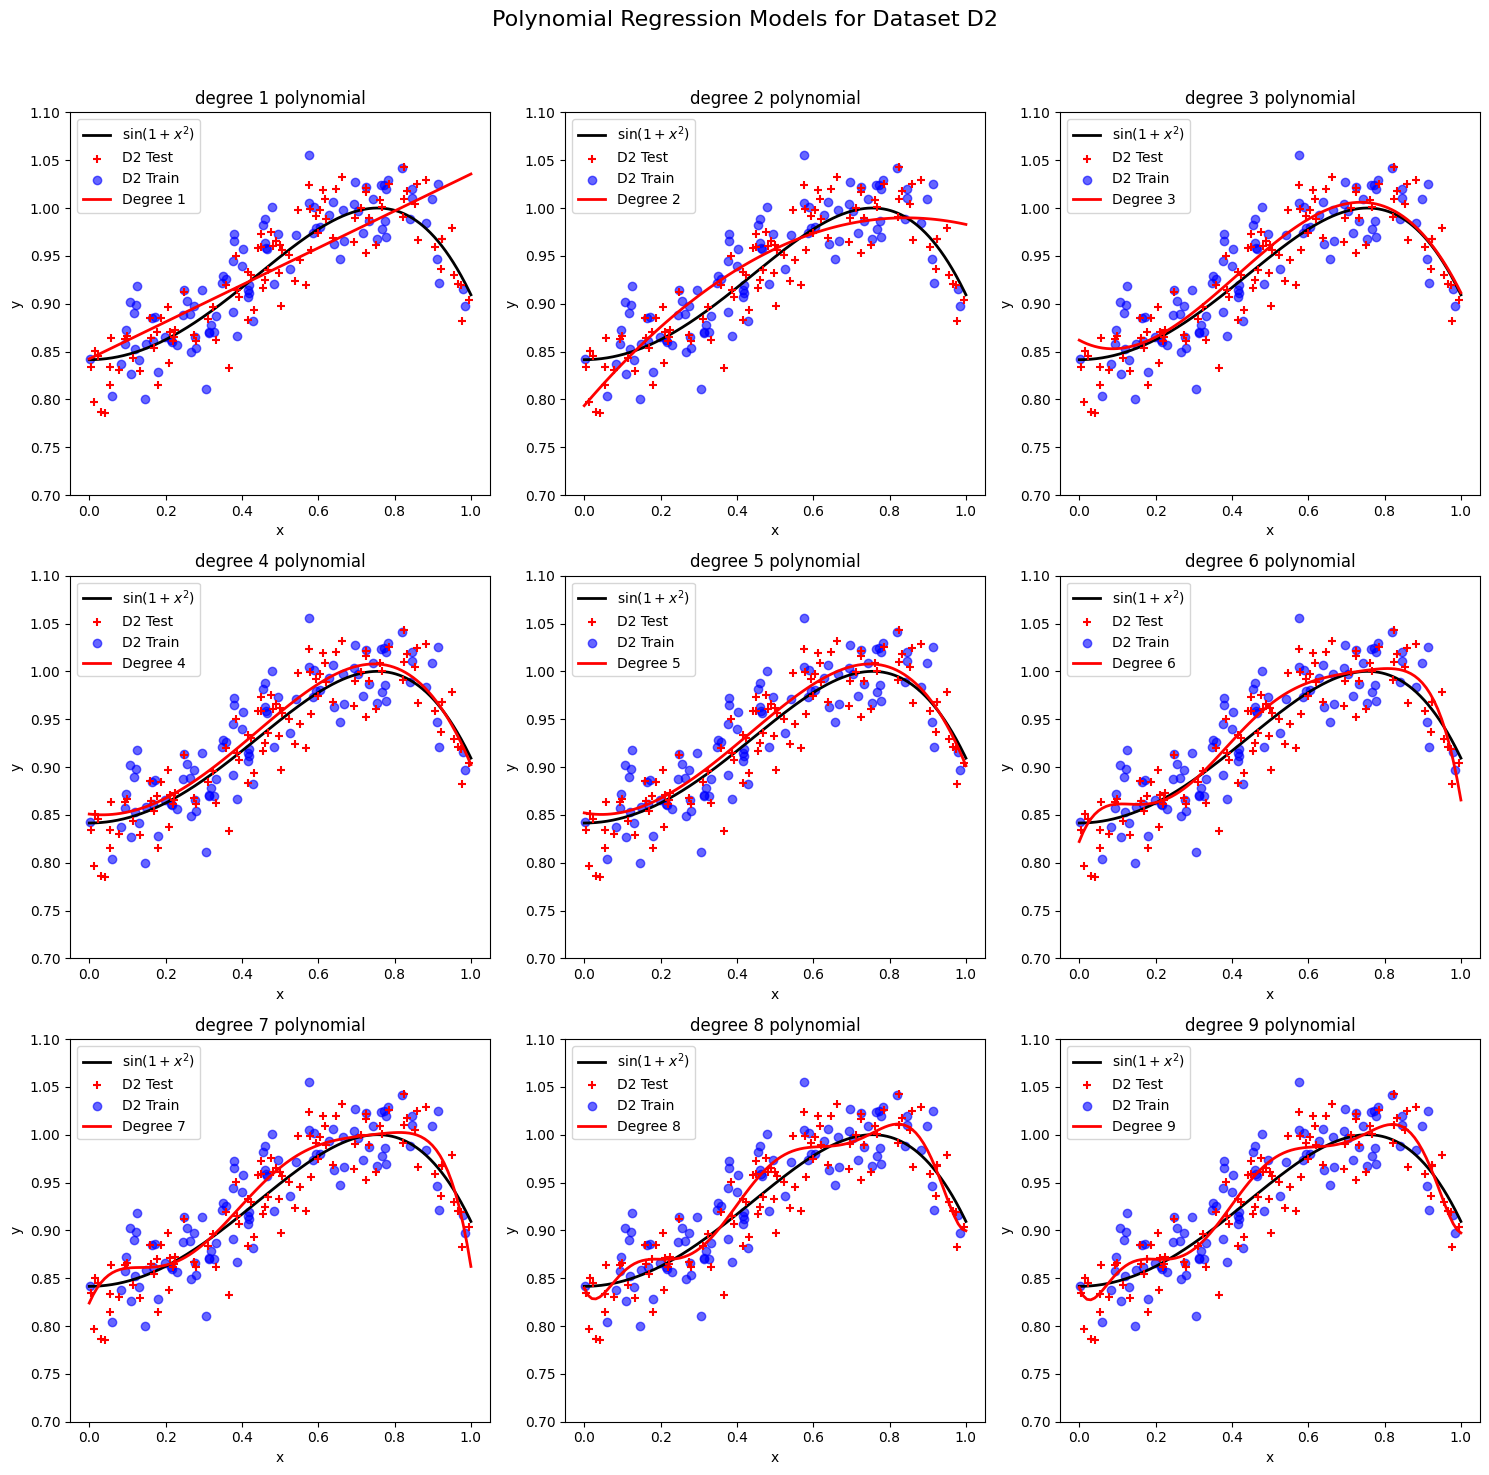

In [173]:
#With D2 dataset
X_poly_D2_list = [polynomial_feature.fit_transform(D2_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D2 = [LinearRegression() for _ in range(1, 10)]

for model, X_poly in zip(models_list_D2, X_poly_D2_list):
    model.fit(X_poly, D2_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]  # Transform for each degree

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D2", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D2)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D2_test_x, D2_test_y, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D2_train_x, D2_train_y, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [174]:
E_in_list_D2 = []
E_out_list_D2 = []

X_poly_D2_test_list = [poly.fit_transform(D2_test_x) for poly in polynomialfeatures_list]
for model, X_poly_train, X_poly_test in zip(models_list_D2, X_poly_D2_list, X_poly_D2_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D2_train_y, y_train_pred)
    E_in_list_D2.append(E_in)
    
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D2_test_y, y_test_pred)
    E_out_list_D2.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D2, E_out_list_D2):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")

Degree 1: E_in = 0.0015, E_out = 0.0018
Degree 2: E_in = 0.0012, E_out = 0.0011
Degree 3: E_in = 0.0009, E_out = 0.0008
Degree 4: E_in = 0.0009, E_out = 0.0008
Degree 5: E_in = 0.0009, E_out = 0.0008
Degree 6: E_in = 0.0008, E_out = 0.0008
Degree 7: E_in = 0.0008, E_out = 0.0008
Degree 8: E_in = 0.0008, E_out = 0.0007
Degree 9: E_in = 0.0008, E_out = 0.0007


## The Table of $E_{in}$ and $E_{out}$ in Dataset D3
| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0015    | 0.0018     |
| **2**   | 0.0012    | 0.0011     |
| **3**   | 0.0009    | 0.0008     |
| **4**   | 0.0009    | 0.0008     |
| **5**   | 0.0009    | 0.0008     |
| **6**   | 0.0008    | 0.0008     |
| **7**   | 0.0008    | 0.0008     |
| **8**   | 0.0008    | 0.0007     |
| **9**   | 0.0008    | 0.0007     |


## D3 Dataset

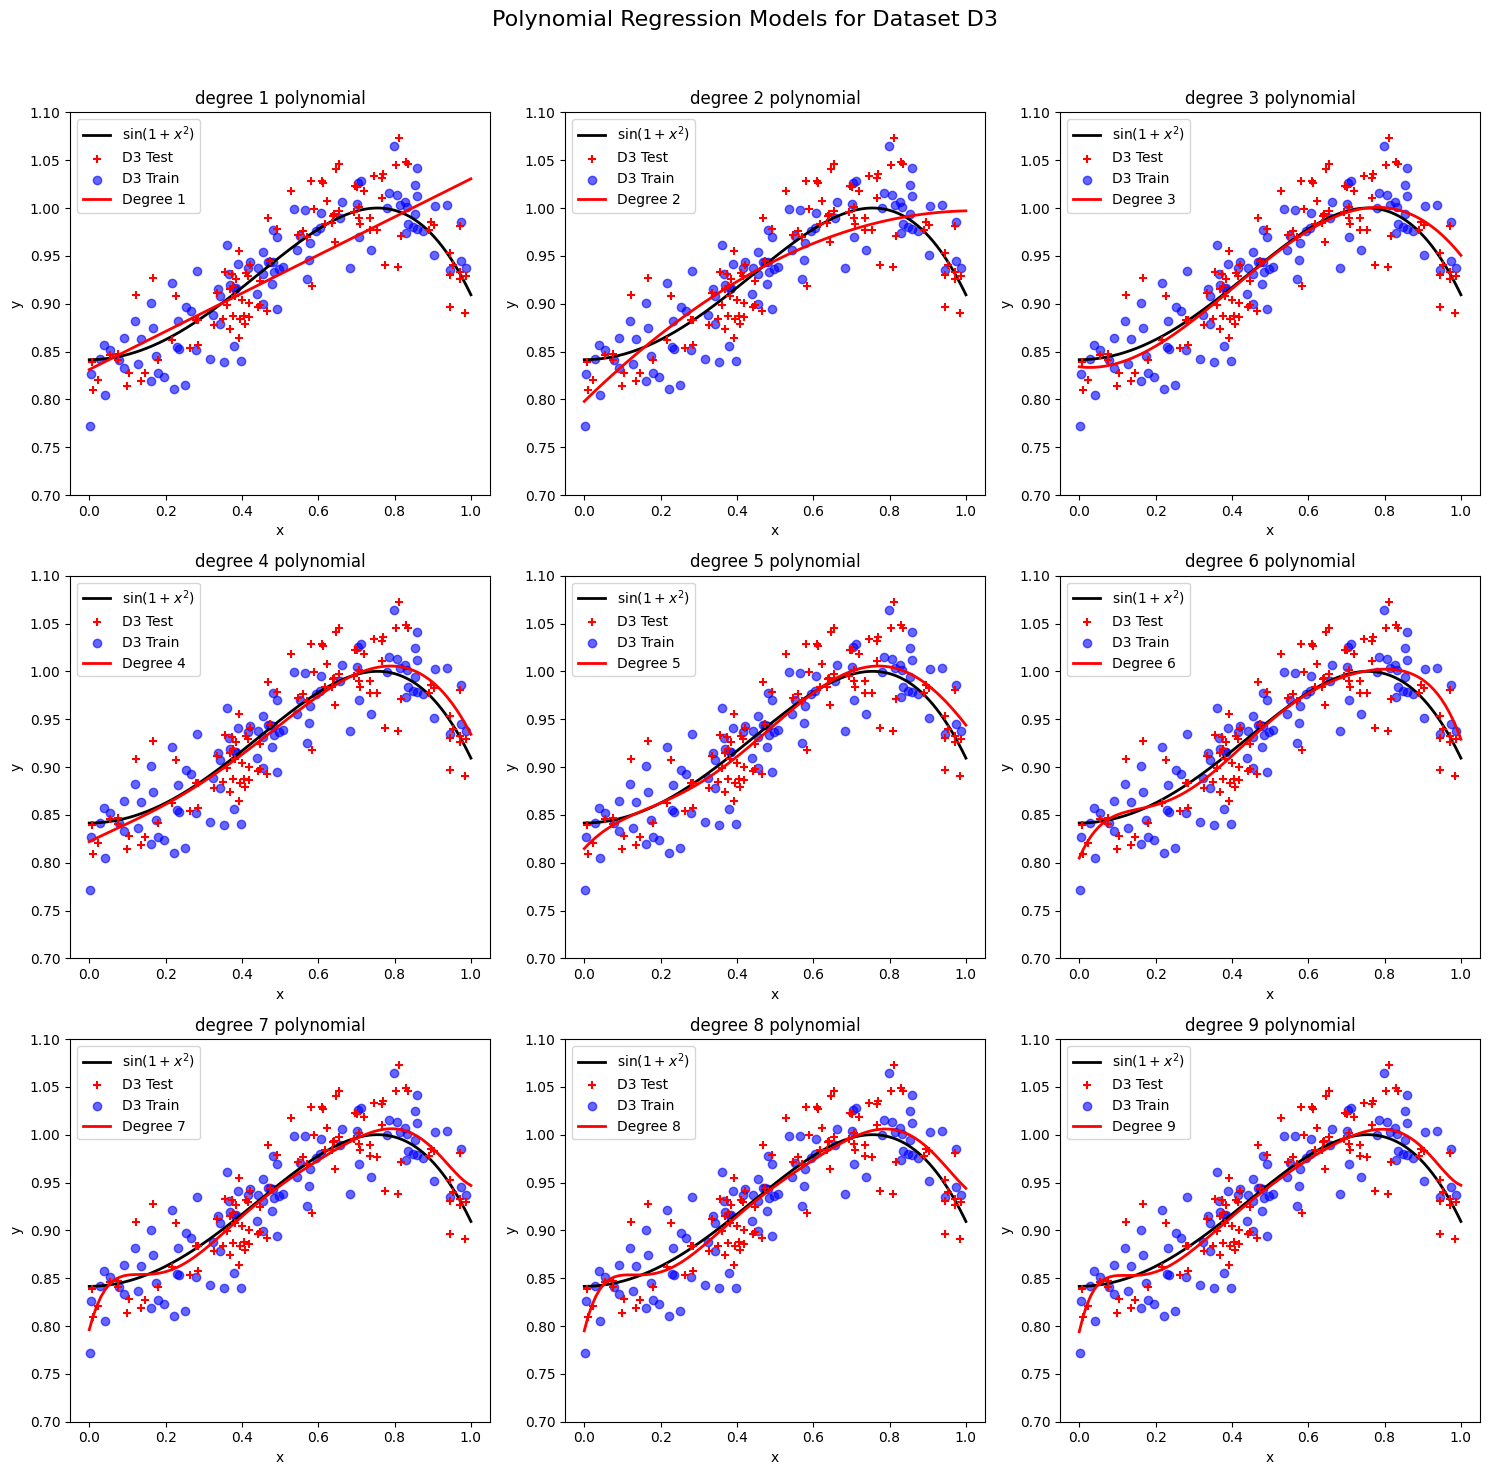

In [175]:
X_poly_D3_list = [polynomial_feature.fit_transform(D3_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D3 = [LinearRegression() for _ in range(1, 10)]

for model, X_poly in zip(models_list_D3, X_poly_D3_list):
    model.fit(X_poly, D3_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D3", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D3)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D3_test_x, D3_test_y, color='red', marker='+', label='D3 Test', zorder=5)
    ax.scatter(D3_train_x, D3_train_y, color='blue', label='D3 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [176]:
E_in_list_D3 = []
E_out_list_D3 = []

X_poly_D3_test_list = [poly.fit_transform(D3_test_x) for poly in polynomialfeatures_list]

for model, X_poly_train, X_poly_test in zip(models_list_D3, X_poly_D3_list, X_poly_D3_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D3_train_y, y_train_pred)
    E_in_list_D3.append(E_in)
    
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D3_test_y, y_test_pred)
    E_out_list_D3.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D3, E_out_list_D3):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")


Degree 1: E_in = 0.0012, E_out = 0.0021
Degree 2: E_in = 0.0010, E_out = 0.0016
Degree 3: E_in = 0.0009, E_out = 0.0011
Degree 4: E_in = 0.0008, E_out = 0.0010
Degree 5: E_in = 0.0008, E_out = 0.0010
Degree 6: E_in = 0.0008, E_out = 0.0010
Degree 7: E_in = 0.0008, E_out = 0.0010
Degree 8: E_in = 0.0008, E_out = 0.0010
Degree 9: E_in = 0.0008, E_out = 0.0010


## The Table of $E_{in}$ and $E_{out}$ in Dataset D3
| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0012    | 0.0021     |
| **2**   | 0.0010    | 0.0016     |
| **3**   | 0.0009    | 0.0011     |
| **4**   | 0.0008    | 0.0010     |
| **5**   | 0.0008    | 0.0010     |
| **6**   | 0.0008    | 0.0010     |
| **7**   | 0.0008    | 0.0010     |
| **8**   | 0.0008    | 0.0010     |
| **9**   | 0.0008    | 0.0010     |


# Data with 1000 random points

In [177]:
#Create D1_data,D2_data,D3_data
D1_train_x,D1_train_y, D1_test_x,D1_test_y = random_data(1000)
D2_train_x,D2_train_y, D2_test_x,D2_test_y = random_data(1000)
D3_train_x,D3_train_y, D3_test_x,D3_test_y = random_data(1000)

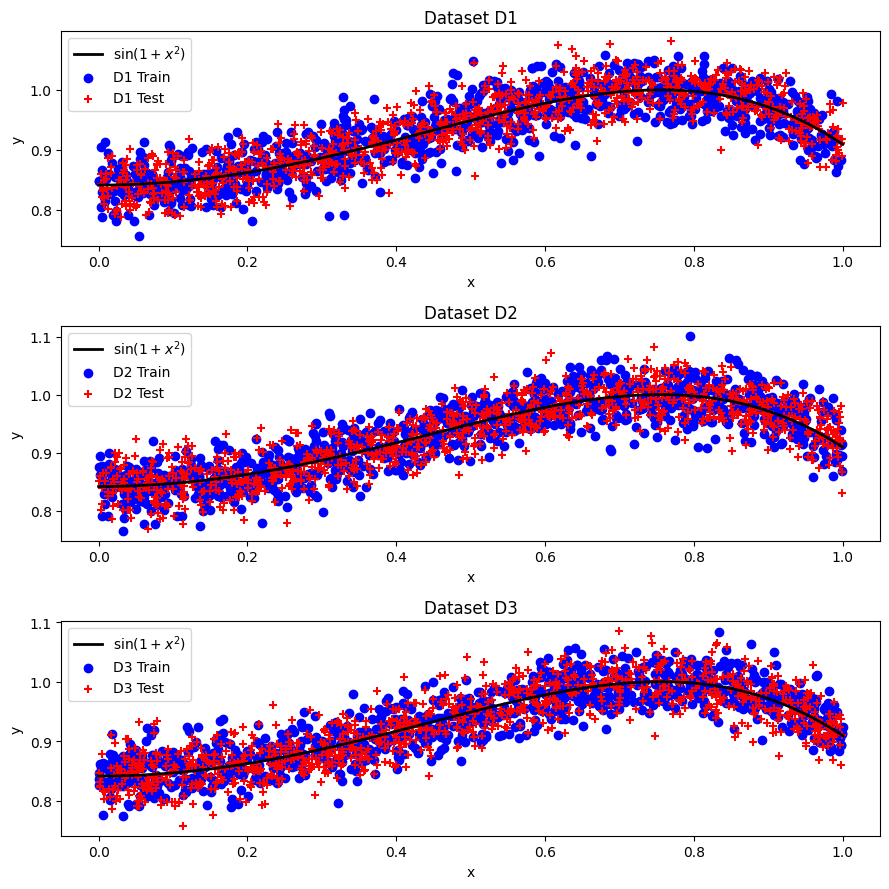

In [181]:
x_vals = np.linspace(0, 1, 1000)
y_vals = target_function(x_vals)
plt.figure(figsize=(9, 9))

# D1 plot
plt.subplot(3, 1, 1)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2,zorder = 10)  
plt.scatter(D1_train_x, D1_train_y, color='blue', label='D1 Train', zorder=5)
plt.scatter(D1_test_x, D1_test_y, color='red', marker='+', label='D1 Test', zorder=5)
plt.title('Dataset D1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D2 plot
plt.subplot(3, 1, 2)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2,zorder = 10)  
plt.scatter(D2_train_x, D2_train_y, color='blue', label='D2 Train', zorder=5)
plt.scatter(D2_test_x, D2_test_y, color='red', marker='+', label='D2 Test', zorder=5)
plt.title('Dataset D2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D3 plot
plt.subplot(3, 1, 3)
plt.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2,zorder = 10)  
plt.scatter(D3_train_x, D3_train_y, color='blue', label='D3 Train', zorder=5)
plt.scatter(D3_test_x, D3_test_y, color='red', marker='+', label='D3 Test', zorder=5)
plt.title('Dataset D3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## D1 Dataset

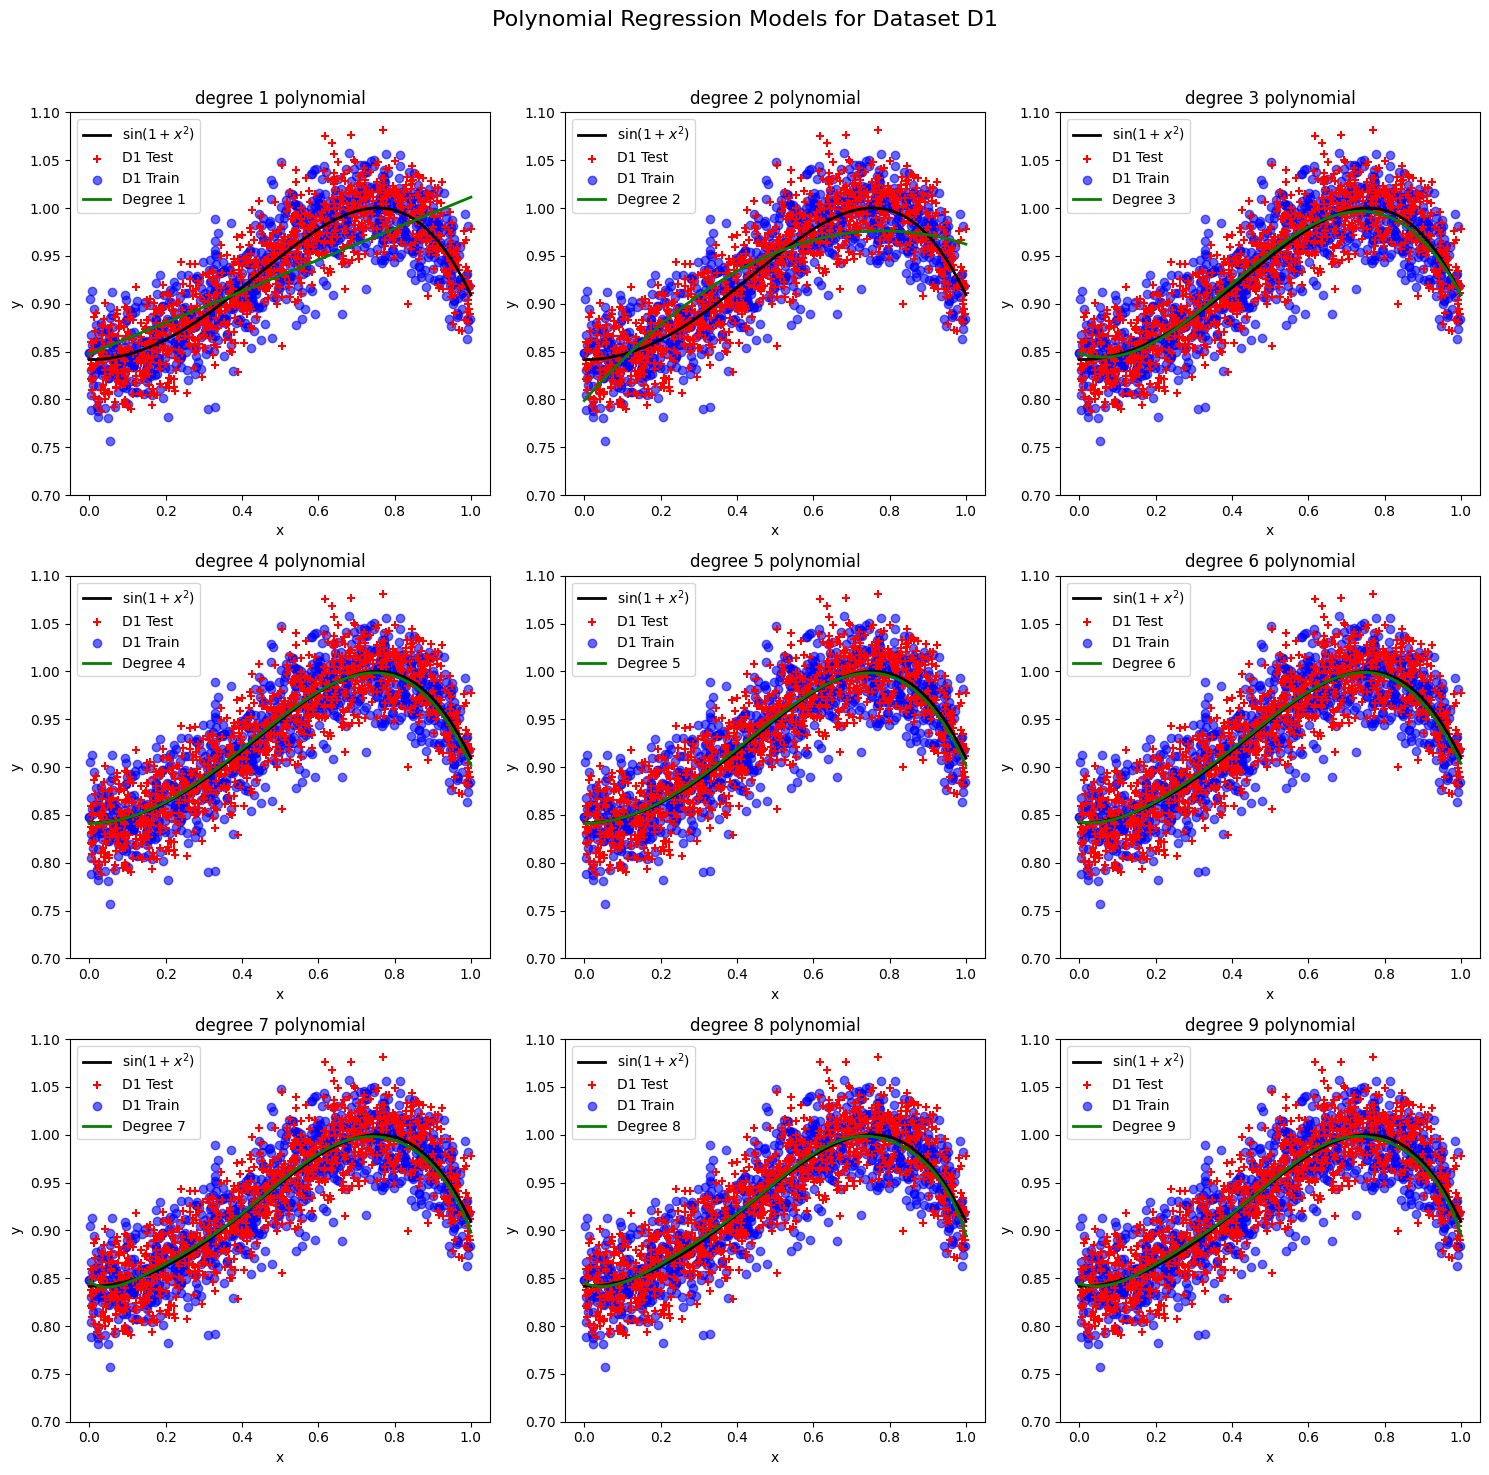

In [183]:
#With D1 dataset
X_poly_D1_list = [polynomial_feature.fit_transform(D1_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D1 = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(models_list_D1, X_poly_D1_list):
    model.fit(X_poly, D1_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]  # Transform for each degree

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D1", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D1)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2,zorder = 10)
    ax.scatter(D1_test_x, D1_test_y, color='red', marker='+', label='D1 Test', zorder=5)
    ax.scatter(D1_train_x, D1_train_y, color='blue', label='D1 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='green', label=f'Degree {degree}', linewidth=2 , zorder = 15)
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [184]:
E_in_list_D1 = []
E_out_list_D1 = []


X_poly_D1_test_list = [poly.fit_transform(D1_test_x) for poly in polynomialfeatures_list]

for model, X_poly_train, X_poly_test in zip(models_list_D1, X_poly_D1_list, X_poly_D1_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D1_train_y, y_train_pred)
    E_in_list_D1.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D1_test_y, y_test_pred)
    E_out_list_D1.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D1, E_out_list_D1):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")

Degree 1: E_in = 0.0017, E_out = 0.0017
Degree 2: E_in = 0.0013, E_out = 0.0012
Degree 3: E_in = 0.0009, E_out = 0.0009
Degree 4: E_in = 0.0009, E_out = 0.0008
Degree 5: E_in = 0.0009, E_out = 0.0008
Degree 6: E_in = 0.0009, E_out = 0.0008
Degree 7: E_in = 0.0009, E_out = 0.0008
Degree 8: E_in = 0.0009, E_out = 0.0008
Degree 9: E_in = 0.0009, E_out = 0.0008


## The Table of $E_{in}$ and $E_{out}$ in Dataset D1
| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0017    | 0.0017     |
| **2**   | 0.0013    | 0.0012     |
| **3**   | 0.0009    | 0.0009     |
| **4**   | 0.0009    | 0.0008     |
| **5**   | 0.0009    | 0.0008     |
| **6**   | 0.0009    | 0.0008     |
| **7**   | 0.0009    | 0.0008     |
| **8**   | 0.0009    | 0.0008     |
| **9**   | 0.0009    | 0.0008     |


## D2 Dataset

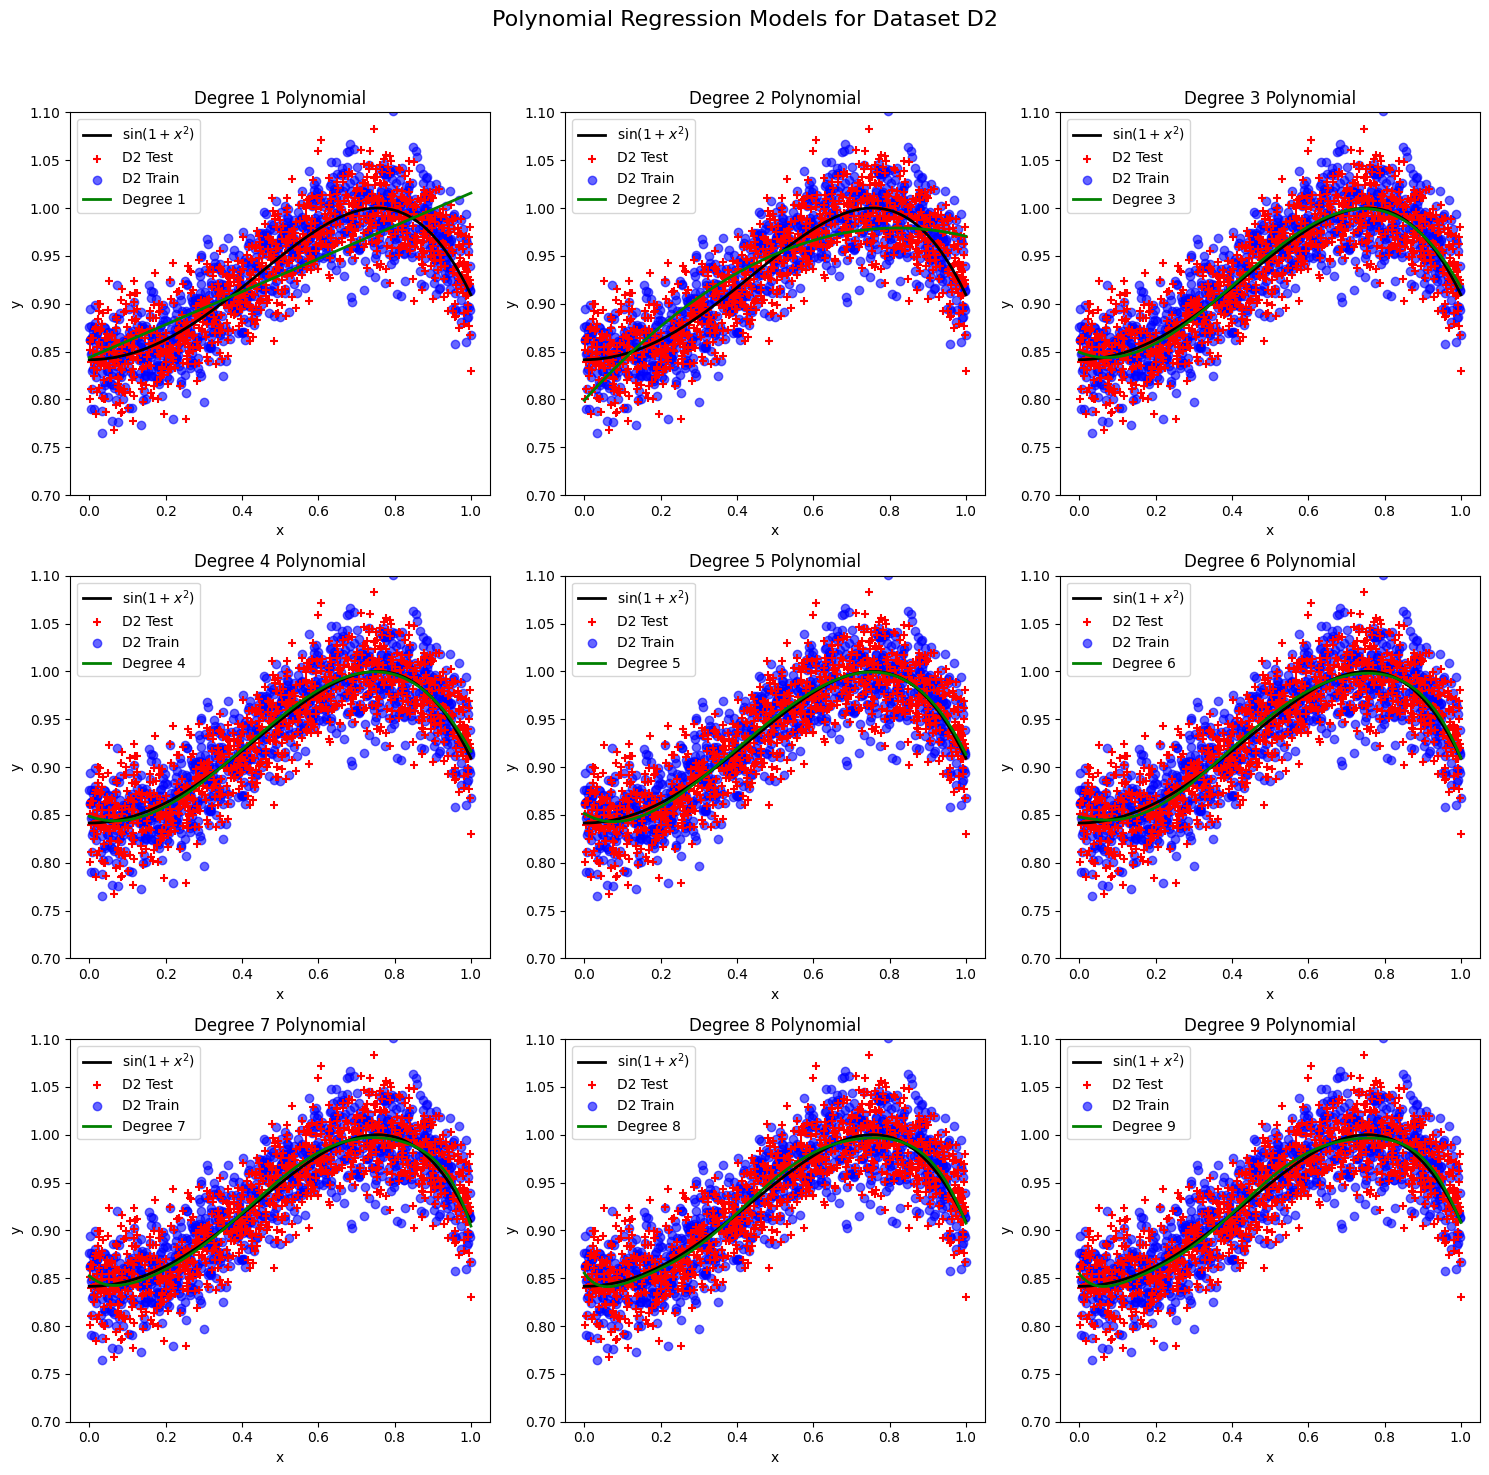

In [187]:
# With D2 dataset
X_poly_D2_list = [polynomial_feature.fit_transform(D2_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D2 = [LinearRegression() for _ in range(1, 10)] 

for model, X_poly in zip(models_list_D2, X_poly_D2_list):
    model.fit(X_poly, D2_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]  # Transform for each degree

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D2", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D2)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2, zorder=10)
    ax.scatter(D2_test_x, D2_test_y, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D2_train_x, D2_train_y, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='green', label=f'Degree {degree}', linewidth=2, zorder=15)
    ax.set_title(f'Degree {i+1} Polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [188]:
E_in_list_D2 = []
E_out_list_D2 = []

X_poly_D2_test_list = [poly.fit_transform(D2_test_x) for poly in polynomialfeatures_list]

for model, X_poly_train, X_poly_test in zip(models_list_D2, X_poly_D2_list, X_poly_D2_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D2_train_y, y_train_pred)
    E_in_list_D2.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D2_test_y, y_test_pred)
    E_out_list_D2.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D2, E_out_list_D2):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")


Degree 1: E_in = 0.0017, E_out = 0.0017
Degree 2: E_in = 0.0013, E_out = 0.0013
Degree 3: E_in = 0.0009, E_out = 0.0009
Degree 4: E_in = 0.0009, E_out = 0.0009
Degree 5: E_in = 0.0009, E_out = 0.0009
Degree 6: E_in = 0.0009, E_out = 0.0009
Degree 7: E_in = 0.0009, E_out = 0.0009
Degree 8: E_in = 0.0009, E_out = 0.0009
Degree 9: E_in = 0.0009, E_out = 0.0009


## The Table of $E_{in}$ and $E_{out}$ in Dataset D2
| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0017    | 0.0017     |
| **2**   | 0.0013    | 0.0013     |
| **3**   | 0.0009    | 0.0009     |
| **4**   | 0.0009    | 0.0009     |
| **5**   | 0.0009    | 0.0009     |
| **6**   | 0.0009    | 0.0009     |
| **7**   | 0.0009    | 0.0009     |
| **8**   | 0.0009    | 0.0009     |
| **9**   | 0.0009    | 0.0009     |


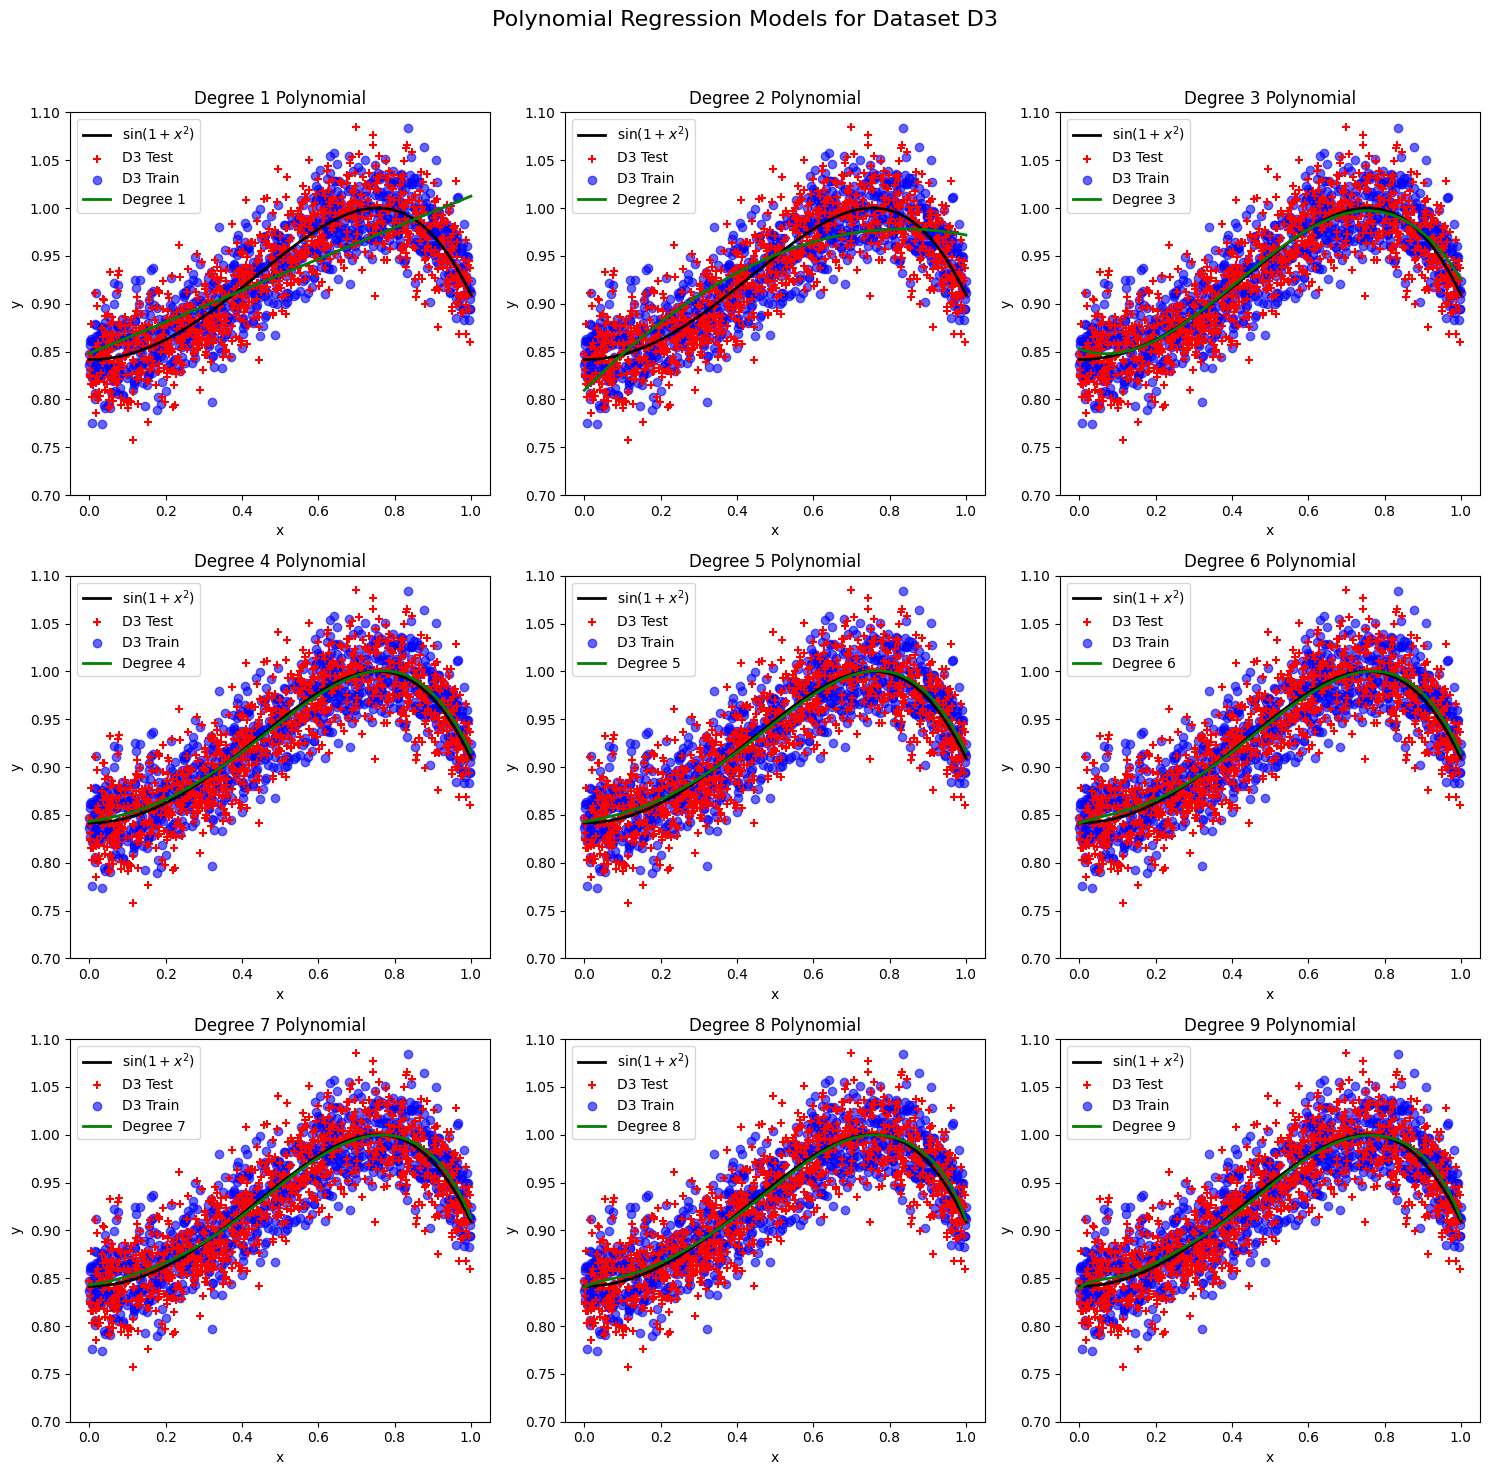

In [190]:
# With D3 dataset
X_poly_D3_list = [polynomial_feature.fit_transform(D3_train_x) for polynomial_feature in polynomialfeatures_list]
models_list_D3 = [LinearRegression() for _ in range(1, 10)] 

for model, X_poly in zip(models_list_D3, X_poly_D3_list):
    model.fit(X_poly, D3_train_y)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in polynomialfeatures_list]  # Transform for each degree

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for Dataset D3", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, models_list_D3)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(x_vals, y_vals, color='black', label=r'$\sin(1 + x^2)$', linewidth=2, zorder=10)
    ax.scatter(D3_test_x, D3_test_y, color='red', marker='+', label='D3 Test', zorder=5)
    ax.scatter(D3_train_x, D3_train_y, color='blue', label='D3 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='green', label=f'Degree {degree}', linewidth=2, zorder=15)
    ax.set_title(f'Degree {i+1} Polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [191]:
E_in_list_D3 = []
E_out_list_D3 = []

X_poly_D3_test_list = [poly.fit_transform(D3_test_x) for poly in polynomialfeatures_list]

for model, X_poly_train, X_poly_test in zip(models_list_D3, X_poly_D3_list, X_poly_D3_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D3_train_y, y_train_pred)
    E_in_list_D3.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D3_test_y, y_test_pred)
    E_out_list_D3.append(E_out)

for degree, E_in, E_out in zip(range(1, 10), E_in_list_D3, E_out_list_D3):
    print(f"Degree {degree}: E_in = {E_in:.4f}, E_out = {E_out:.4f}")


Degree 1: E_in = 0.0015, E_out = 0.0018
Degree 2: E_in = 0.0012, E_out = 0.0014
Degree 3: E_in = 0.0008, E_out = 0.0010
Degree 4: E_in = 0.0008, E_out = 0.0010
Degree 5: E_in = 0.0008, E_out = 0.0010
Degree 6: E_in = 0.0008, E_out = 0.0010
Degree 7: E_in = 0.0008, E_out = 0.0010
Degree 8: E_in = 0.0008, E_out = 0.0010
Degree 9: E_in = 0.0008, E_out = 0.0010


## The Table of $E_{in}$ and $E_{out}$ in Dataset D3

| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0015    | 0.0018     |
| **2**   | 0.0012    | 0.0014     |
| **3**   | 0.0008    | 0.0010     |
| **4**   | 0.0008    | 0.0010     |
| **5**   | 0.0008    | 0.0010     |
| **6**   | 0.0008    | 0.0010     |
| **7**   | 0.0008    | 0.0010     |
| **8**   | 0.0008    | 0.0010     |
| **9**   | 0.0008    | 0.0010     |


## Trả lời câu hỏi

# 1. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?
Khi tăng độ phức tạp của mô hình bias thường sẽ giảm vì lúc này mô hình có thể học được nhiều đặc điểm hơn và khớp với dữ liệu hơn nhưng khi tăng quá mức thì có thể đẫn đến overfiting

## 2. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?
Khi tăng độ phức tạp của mô hình thường variance thường sẽ tăng vì lúc này mô hình đã làm tăng sự biến thiên hơn của các dự đoán và mô hình lúc này sẽ càng bám sát dữ liệu huấn luyện 
Khi tăng độ phức tạp quá mức có thể dẫn đến overfiting => lúc này có thể đúng với tập train nhưng chưa chắc với tập test

# 3. Tăng kích thước tập train ảnh hưởng thế nào đến bias?
Tăng kích thước tập train có thể giảm bias trong trường hợp mô hình đủ phức tạp vì lúc này nó có nhiều dữ liệu để học hơn và cộng thêm khả năng học tốt từ mô hình phức tạp đó
Với mô hình không đủ phức tạp thì bias vẫn có thể sẽ cao và bias không thay đổi một cách đáng kể vì nó không đủ phức tạp để học một cách tổng quát hơn


# 4. Tăng kích thước tập train ảnh hưởng thế nào đến variance?
Tăng kích thước tập huấn luyện giảm variance vì mô hình có nhiều dữ liệu hơn để học, nó có thể tạo ra các dự đoán ổn định hơn. Một tập huấn luyện lớn sẽ giúp mô hình tránh việc học thuộc lòng các đặc điểm riêng biệt hoặc nhiễu của một tập dữ liệu nhỏ và với tập huấn luyện lớn hơn, mô hình sẽ ít bị ảnh hưởng bởi những thay đổi nhỏ trong dữ liệu huấn luyện
